<a href="https://colab.research.google.com/github/Raanank10/Instagram-s-influencers/blob/raanan_0909/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram_influencers**

# Global Parameters

In [1]:
fname = 'ai_posts_analysis_data.xlsx'
url = 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/ai_posts_analysis_data.xlsx'

# Get the Data

In [2]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report # elad 20210708
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
df = pd.read_csv(url, index_col = False)  
df.drop('1',inplace=True,axis=1)
df.head()


,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
0,36193140327,elastici_e_passamaneria,Elastici e Passamaneria,1052,2530600951335029174,CMegChUlwm2,23,0,2.19,https://www.instagram.com/p/CMegChUlwm2,"Photo by Elastici e Passamaneria on March 16, ...",FFP2 MADE IN ITALY????????#ffp2mask#italiansty...,NaN,NaN,NaN,1615891163,"Clothing, Apparel, Text, Money, Collage, Adver...",education,movies,business,https://instagram.fdok2-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN
1,8210198494,pamela.latorre.73,Pamela La Torre,309,2595285287724490476,CQETjgBnZ7s,55,23,25.24,https://www.instagram.com/p/CQETjgBnZ7s,"Photo by Pamela La Torre on June 13, 2021. May...",Prima comunione Giorgio,Santissimo Crocifisso,"Taranto, Italy",NaN,1623602137,"Person, Human, Photographer, Photography, Phot...",news,arts_entertainment,style_fashion,https://instagram.fhel3-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN
2,36838177086,ilaria._004,????????????????,649,2356209223949454778,CCy784yAY26,138,2,21.57,https://www.instagram.com/p/CCy784yAY26,"Photo by ???????????????? on July 18, 2020. Ma...",mirame????,NaN,NaN,NaN,1595102049,"Clothing, Apparel, Person, Human, Female, Swim...",education,arts_entertainment,style_fashion,https://instagram.fgua5-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN
3,33286901341,wellbishstore,Wellbish Store,188,2462740031272344745,CItaQKiH1yp,6,0,3.19,https://www.instagram.com/p/CItaQKiH1yp,"Photo by Wellbish Store on December 12, 2020. ...",How sweet is your Heart? ❤️????\n.\n.\n???? Fo...,NaN,NaN,NaN,1607801511,"Pendant, Accessories, Accessory, Goggles",style_fashion,arts_entertainment,style_fashion,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN
4,5633363536,amineblc,Mohamed Amine,1103,2127311663854320191,B2Fuq_ylPo_,46,4,4.53,https://www.instagram.com/p/B2Fuq_ylPo_,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, ...",NaN,news,style_fashion,https://instagram.fjdf6-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          4792 non-null   int64  
 1   USERNAME                        4792 non-null   object 
 2   FULLNAME                        4666 non-null   object 
 3   FOLLOWER                        4792 non-null   int64  
 4   POST ID                         4792 non-null   int64  
 5   SHORTCODE                       4792 non-null   object 
 6   LIKES                           4792 non-null   int64  
 7   COMMENTS                        4792 non-null   int64  
 8   ENGAGEMENT                      4792 non-null   float64
 9   URL                             4792 non-null   object 
 10  ACCESSIBILITY CAPTION           3943 non-null   object 
 11  CAPTION                         4310 non-null   object 
 12  LOCATION                        11

# EDA

Column names: Replace white spaces with underscore 

In [5]:
df.columns = df.columns.str.replace(' ', '_')

Check for each column how many unique is there (lenght of the dataset 4792, len(df)) 

In [6]:
df.apply(lambda col: len(col.unique())).sort_values(ascending=False)

POST_ID                           4792
SHORTCODE                         4792
IMAGE_URL                         4792
URL                               4792
TIME                              4791
IMAGE_LABELS                      4666
CAPTION                           4216
ACCESSIBILITY_CAPTION             3658
ENGAGEMENT                        1415
VIDEO_URL                          809
LIKES                              588
LOCATION                           533
VIDEO_VIEW_COUNT                   472
USERNAME                           447
USERID                             447
FULLNAME                           432
FOLLOWER                           418
CITY                               328
COMMENTS                           138
COUNTRY                             44
CAPTION_INTEREST                    36
IMAGE_LABEL_INTEREST                35
ACCESSIBILITY_CAPTION_INTEREST      27
COMMENT_DISABLED                     2
IS_VIDEO                             2
HAS_AUDIO                

## Data Cleaning

## Handle NaN valus

How Many NaN values are ther in the datast?

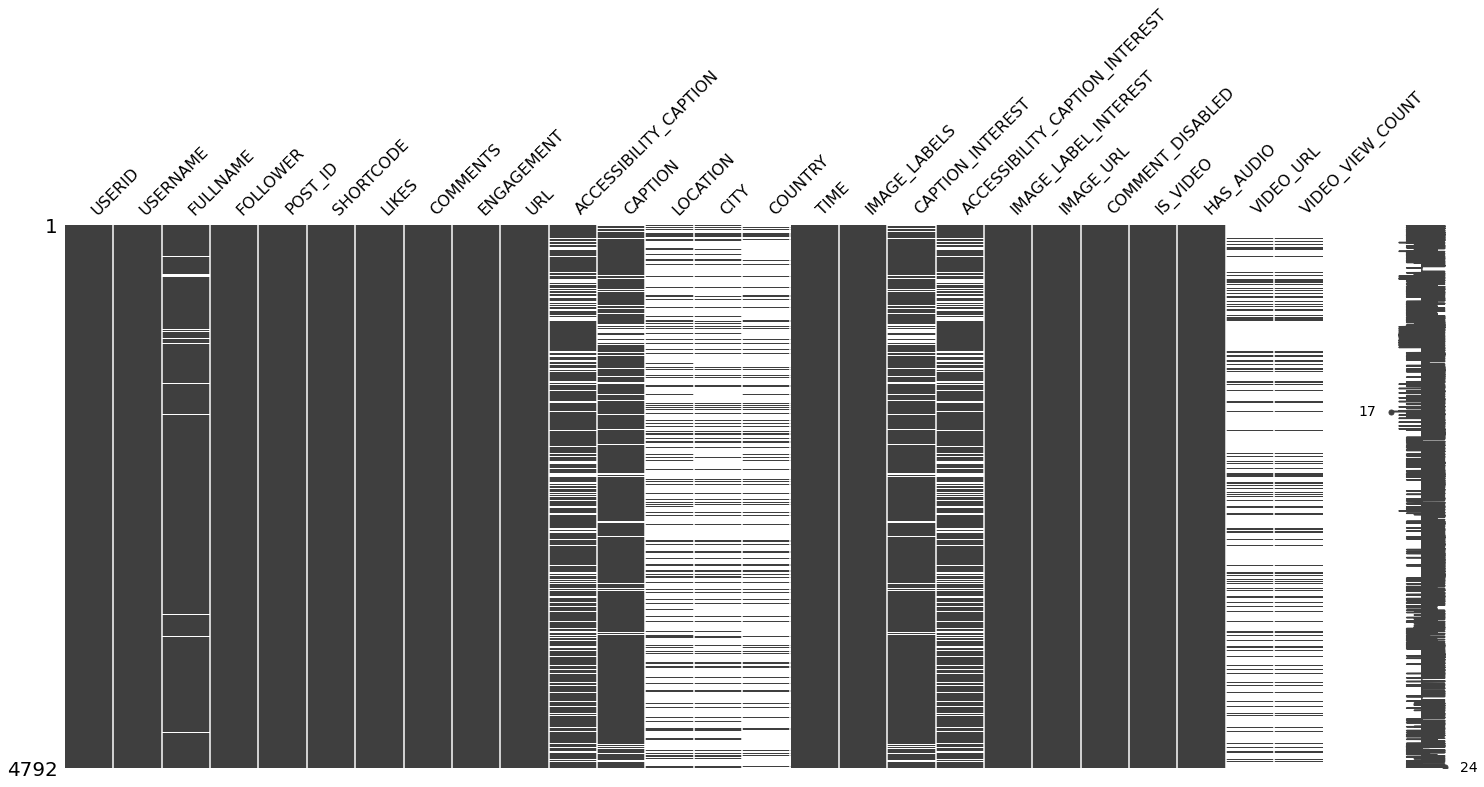

In [7]:
msno.matrix(df)

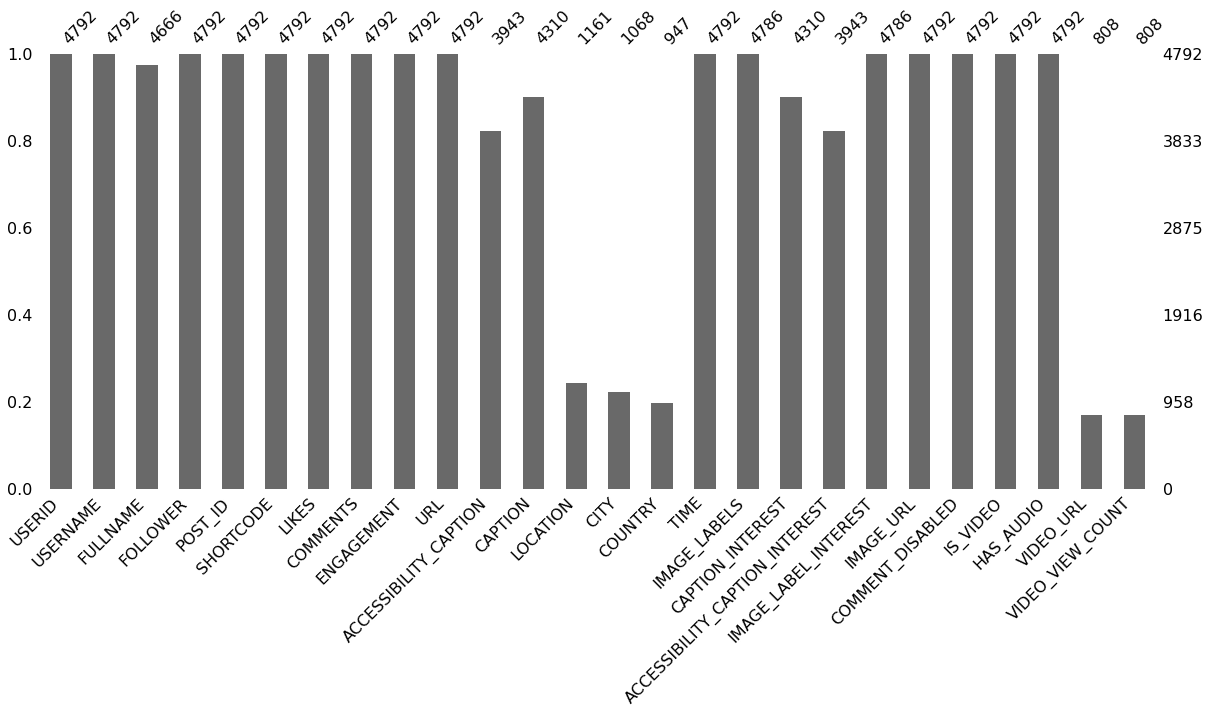

In [8]:
msno.bar(df, figsize=(20, 8))

Conert unix time to separate Date and Time columns

In [9]:
df['DATETIME'] = pd.to_datetime(df['TIME'],unit='s')

In [10]:
df['YEAR'] = pd.DatetimeIndex(df['DATETIME']).year
df['MONTH'] = pd.DatetimeIndex(df['DATETIME']).month
df['DAY'] = pd.DatetimeIndex(df['DATETIME']).day
df['DAYOFWEEK'] = pd.DatetimeIndex(df['DATETIME']).dayofweek
df['HOUR'] = pd.DatetimeIndex(df['DATETIME']).hour
df['MINUTE'] = pd.DatetimeIndex(df['DATETIME']).minute

Remove column that all values are unique:

In [11]:
for col in df.columns:
    if len(df[col].unique()) == len(df):
        print(col)
        #df.drop(col,inplace=True,axis=1)

POST_ID
SHORTCODE
URL
IMAGE_URL


In [12]:
df.head()

,USERID,USERNAME,FULLNAME,FOLLOWER,POST_ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,IMAGE_URL,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_URL,VIDEO_VIEW_COUNT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE
0,36193140327,elastici_e_passamaneria,Elastici e Passamaneria,1052,2530600951335029174,CMegChUlwm2,23,0,2.19,https://www.instagram.com/p/CMegChUlwm2,"Photo by Elastici e Passamaneria on March 16, ...",FFP2 MADE IN ITALY????????#ffp2mask#italiansty...,NaN,NaN,NaN,1615891163,"Clothing, Apparel, Text, Money, Collage, Adver...",education,movies,business,https://instagram.fdok2-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN,2021-03-16 10:39:23,2021,3,16,1,10,39
1,8210198494,pamela.latorre.73,Pamela La Torre,309,2595285287724490476,CQETjgBnZ7s,55,23,25.24,https://www.instagram.com/p/CQETjgBnZ7s,"Photo by Pamela La Torre on June 13, 2021. May...",Prima comunione Giorgio,Santissimo Crocifisso,"Taranto, Italy",NaN,1623602137,"Person, Human, Photographer, Photography, Phot...",news,arts_entertainment,style_fashion,https://instagram.fhel3-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN,2021-06-13 16:35:37,2021,6,13,6,16,35
2,36838177086,ilaria._004,????????????????,649,2356209223949454778,CCy784yAY26,138,2,21.57,https://www.instagram.com/p/CCy784yAY26,"Photo by ???????????????? on July 18, 2020. Ma...",mirame????,NaN,NaN,NaN,1595102049,"Clothing, Apparel, Person, Human, Female, Swim...",education,arts_entertainment,style_fashion,https://instagram.fgua5-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN,2020-07-18 19:54:09,2020,7,18,5,19,54
3,33286901341,wellbishstore,Wellbish Store,188,2462740031272344745,CItaQKiH1yp,6,0,3.19,https://www.instagram.com/p/CItaQKiH1yp,"Photo by Wellbish Store on December 12, 2020. ...",How sweet is your Heart? ❤️????\n.\n.\n???? Fo...,NaN,NaN,NaN,1607801511,"Pendant, Accessories, Accessory, Goggles",style_fashion,arts_entertainment,style_fashion,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN,2020-12-12 19:31:51,2020,12,12,5,19,31
4,5633363536,amineblc,Mohamed Amine,1103,2127311663854320191,B2Fuq_ylPo_,46,4,4.53,https://www.instagram.com/p/B2Fuq_ylPo_,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, ...",NaN,news,style_fashion,https://instagram.fjdf6-1.fna.fbcdn.net/v/t51....,no,no,no,NaN,NaN,2019-09-07 00:15:33,2019,9,7,5,0,15


In [13]:
df.URL.head()
# SHORTCODE
# URL
# IMAGE_URL
# VIDEO_URL # Not working

0    https://www.instagram.com/p/CMegChUlwm2
1    https://www.instagram.com/p/CQETjgBnZ7s
2    https://www.instagram.com/p/CCy784yAY26
3    https://www.instagram.com/p/CItaQKiH1yp
4    https://www.instagram.com/p/B2Fuq_ylPo_
Name: URL, dtype: object

In [14]:
df.drop('POST_ID',inplace=True,axis=1)

In [15]:
df.drop('VIDEO_URL',inplace=True,axis=1)

In [16]:
df.drop('SHORTCODE',inplace=True,axis=1)

In [17]:
# df.drop('URL',inplace=True,axis=1)

In [18]:
df.drop('IMAGE_URL',inplace=True,axis=1)

Convert columns type to characters :

In [19]:
df['COMMENT_DISABLED'].value_counts()

no     4785
yes       7
Name: COMMENT_DISABLED, dtype: int64

In [20]:
df['COMMENT_DISABLED'] = df['COMMENT_DISABLED'].map(dict(yes=1, no=0))

In [21]:
df['IS_VIDEO'] = df['IS_VIDEO'].map(dict(yes=1, no=0))

In [22]:
df['HAS_AUDIO'] = df['HAS_AUDIO'].map(dict(yes=1, no=0))

In [23]:
df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].value_counts()

COMMENT_DISABLED  IS_VIDEO  HAS_AUDIO
0                 0         0            3981
                  1         1             722
                            0              82
1                 1         1               4
                  0         0               3
dtype: int64

In [24]:
pd.unique(df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].values.ravel('K'))

array([0, 1])

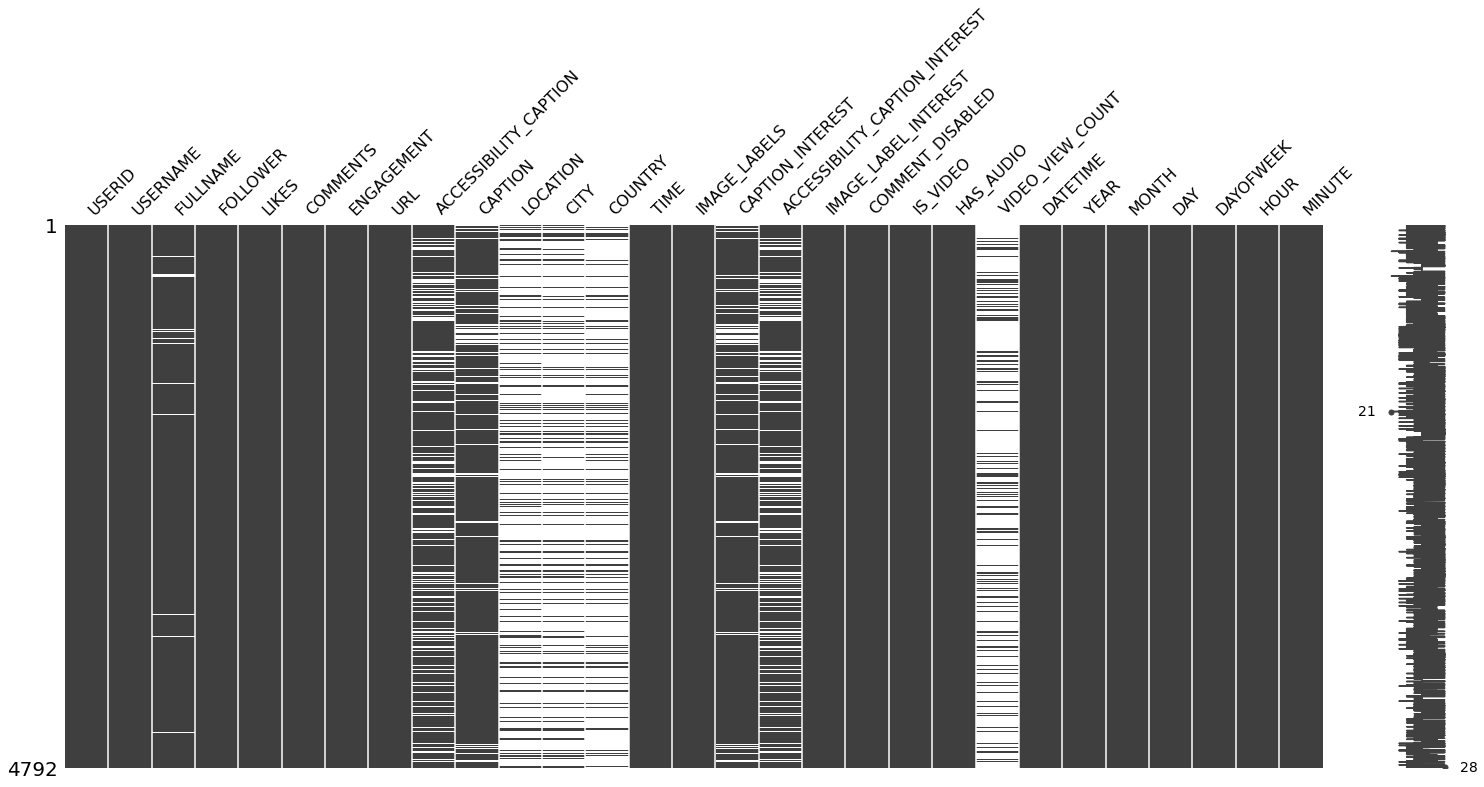

In [25]:
msno.matrix(df)

In [26]:
df.columns

Index(['USERID', 'USERNAME', 'FULLNAME', 'FOLLOWER', 'LIKES', 'COMMENTS',
       'ENGAGEMENT', 'URL', 'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION',
       'CITY', 'COUNTRY', 'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE'],
      dtype='object')

Raname the index

In [27]:
df = df.rename_axis('LINE_NUM_INDEX')

Note by Eladk: we can fill location values by using a merdiction model base in the influancer and the time for the post. <BR> 
For Now, I'll just fill the columns with NULL

Replace all cases where VIDEO_VIEW_COUNT == Nan with 0. <BR> for double check i verified it with is_video column

In [28]:
df['VIDEO_VIEW_COUNT'].fillna(0, inplace=True)

Eladk note 8-Sep-2021: I still need to handle missing values in column:


*   FULLNAME
*   ACCESSIBILITY_CAPTION - specify full name, time, location, video or picture and tag
*   CAPTION - the text on this post (by the post uploader
*   LOCATION, CITY, COUNTRY - location
*   CAPTION_INTEREST -
*   ACCESSIBILITY_CAPTION_INTEREST


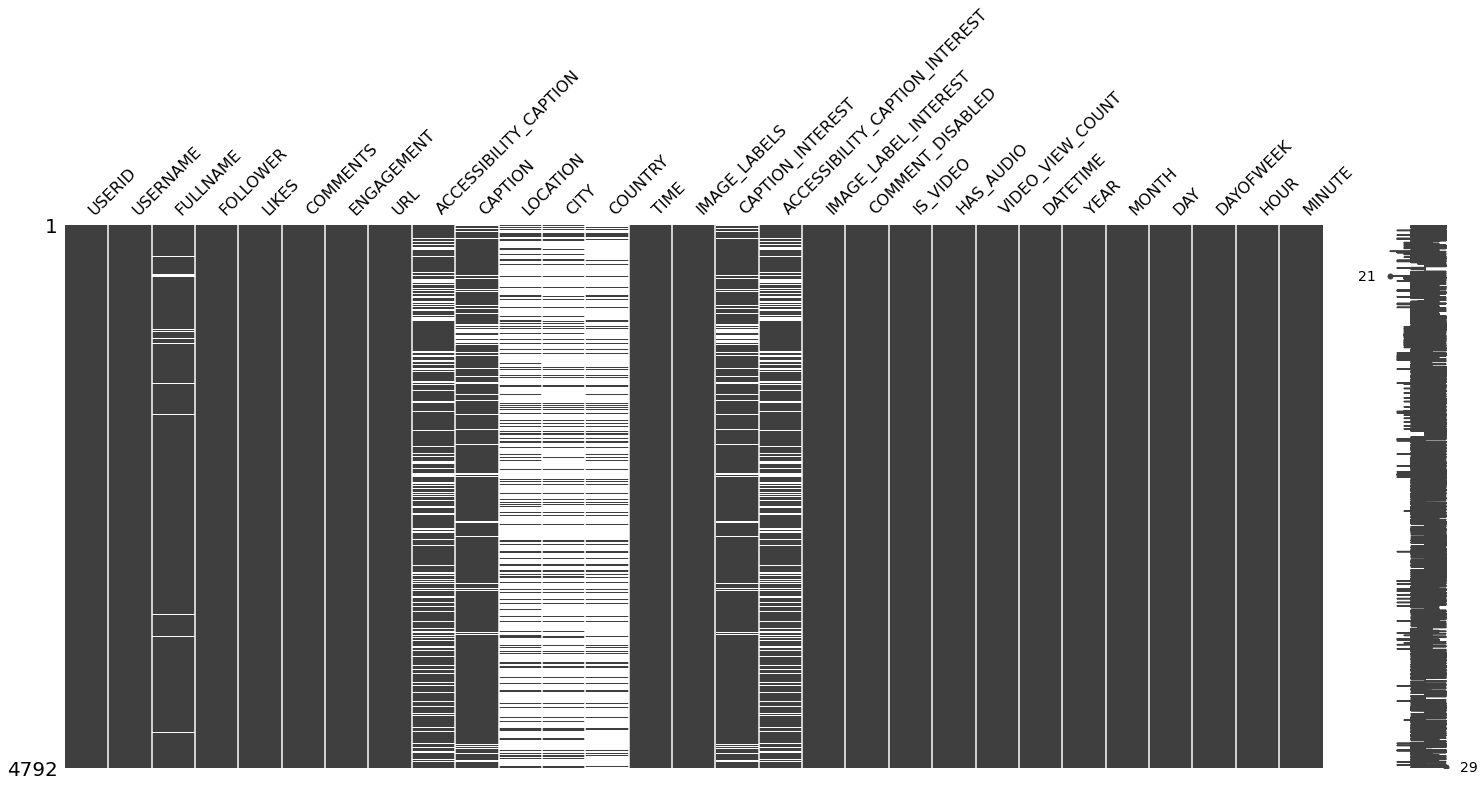

In [29]:
msno.matrix(df)

In [30]:
df.CAPTION.value_counts().sort_values(ascending=False)

????                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     23
????????                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

selecting a subset of the data:

In [31]:
df[['FULLNAME','ACCESSIBILITY_CAPTION','CAPTION','LOCATION', 'CITY', 'COUNTRY','CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(5)

,FULLNAME,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,,,,,,,
0,Elastici e Passamaneria,"Photo by Elastici e Passamaneria on March 16, ...",FFP2 MADE IN ITALY????????#ffp2mask#italiansty...,NaN,NaN,NaN,education,movies
1,Pamela La Torre,"Photo by Pamela La Torre on June 13, 2021. May...",Prima comunione Giorgio,Santissimo Crocifisso,"Taranto, Italy",NaN,news,arts_entertainment
2,????????????????,"Photo by ???????????????? on July 18, 2020. Ma...",mirame????,NaN,NaN,NaN,education,arts_entertainment
3,Wellbish Store,"Photo by Wellbish Store on December 12, 2020. ...",How sweet is your Heart? ❤️????\n.\n.\n???? Fo...,NaN,NaN,NaN,style_fashion,arts_entertainment
4,Mohamed Amine,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,NaN,news


Increase the length to a column so that we'll see all the text in a cell

In [32]:
pd.options.display.max_colwidth = 1000
df.ACCESSIBILITY_CAPTION.head(5)

LINE_NUM_INDEX
0                                                              Photo by Elastici e Passamaneria on March 16, 2021.
1    Photo by Pamela La Torre on June 13, 2021. May be an image of one or more people, people standing and indoor.
2                                         Photo by ???????????????? on July 18, 2020. May be an image of 1 person.
3                                        Photo by Wellbish Store on December 12, 2020. May be an image of jewelry.
4                                                                              Photo by Mohamed Amine in Mawazine.
Name: ACCESSIBILITY_CAPTION, dtype: object

Selecting 1 row by index (specific column only)

In [33]:
df[df.index == 1929][['URL','ACCESSIBILITY_CAPTION','FULLNAME','DATETIME','LOCATION']] # name, 

,URL,ACCESSIBILITY_CAPTION,FULLNAME,DATETIME,LOCATION
LINE_NUM_INDEX,,,,,
1929,https://www.instagram.com/p/CPtkjQeJSBL,"Photo by Kayleigh McIntosh on June 04, 2021. May be an image of 1 person, standing and outdoors.",Kayleigh McIntosh,2021-06-04 20:41:36,NaN


In [34]:
df.columns

Index(['USERID', 'USERNAME', 'FULLNAME', 'FOLLOWER', 'LIKES', 'COMMENTS',
       'ENGAGEMENT', 'URL', 'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION',
       'CITY', 'COUNTRY', 'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE'],
      dtype='object')

In [35]:
df[['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(20)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,
0,education,movies
1,news,arts_entertainment
2,education,arts_entertainment
3,style_fashion,arts_entertainment
4,NaN,news
5,NaN,arts_entertainment
6,NaN,arts_entertainment
7,NaN,arts_entertainment
8,parenting,travel


In [36]:
df[df.index == 1932][['URL','CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']] # name, 

,URL,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,,
1932,https://www.instagram.com/p/CQJTm7iFk1Z,travel,travel


there are 308 combination as CAPTION_INTEREST and ACCESSIBILITY_CAPTION_INTEREST

In [37]:
df.groupby(['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,counts
0,parenting,arts_entertainment,229
1,style_fashion,arts_entertainment,202
2,arts_entertainment,arts_entertainment,193
3,style_fashion,style_fashion,160
4,arts_entertainment,travel,143
5,parenting,travel,129
6,education,arts_entertainment,122
7,food_drink,arts_entertainment,115
8,style_fashion,travel,91
9,travel,arts_entertainment,74


there are 35 unique CAPTION_INTEREST


In [38]:
df.groupby(['CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,counts
0,parenting,804
1,arts_entertainment,680
2,style_fashion,657
3,food_drink,363
4,education,335
5,dating_and_relationships,249
6,travel,246
7,pets,152
8,music,117
9,weddings,84


there are 26 unique ACCESSIBILITY_CAPTION_INTEREST


In [39]:
df.groupby(['ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(30)

,ACCESSIBILITY_CAPTION_INTEREST,counts
0,arts_entertainment,1534
1,travel,724
2,style_fashion,464
3,food_drink,246
4,parenting,239
5,events,206
6,music,89
7,movies,83
8,pets,75
9,news,57


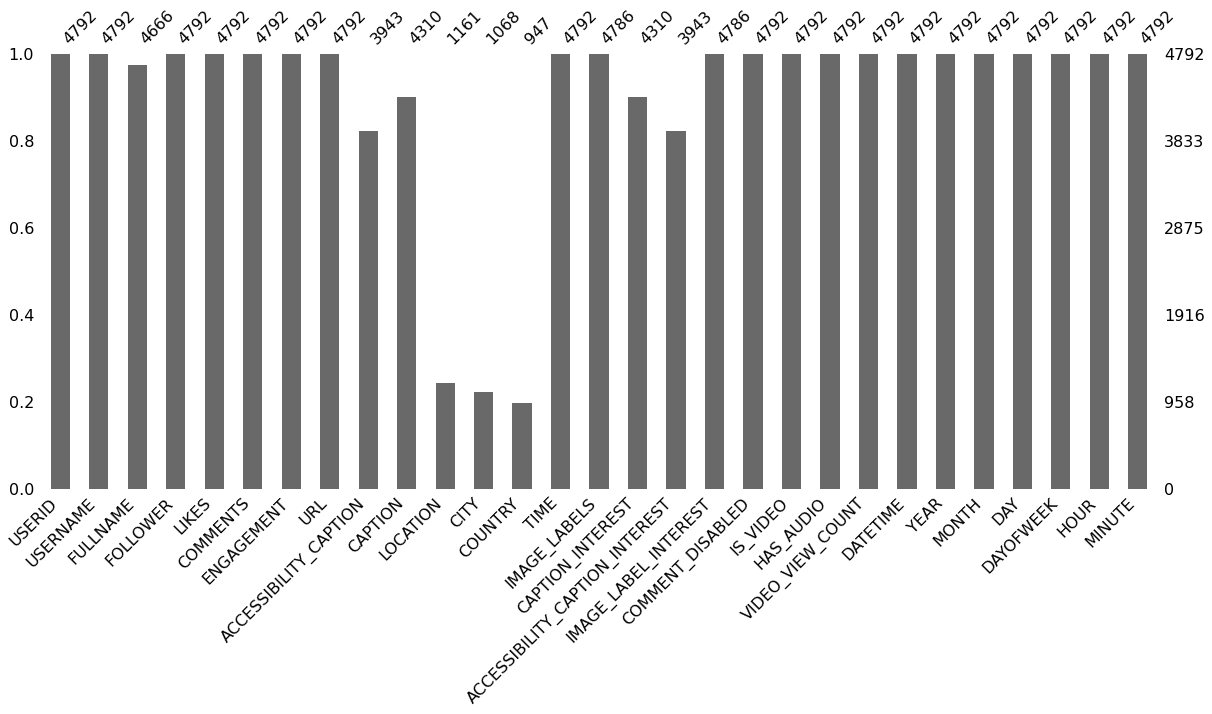

In [40]:
msno.bar(df, figsize=(20, 8))

In [41]:
df["FULLNAME"] = df["FULLNAME"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

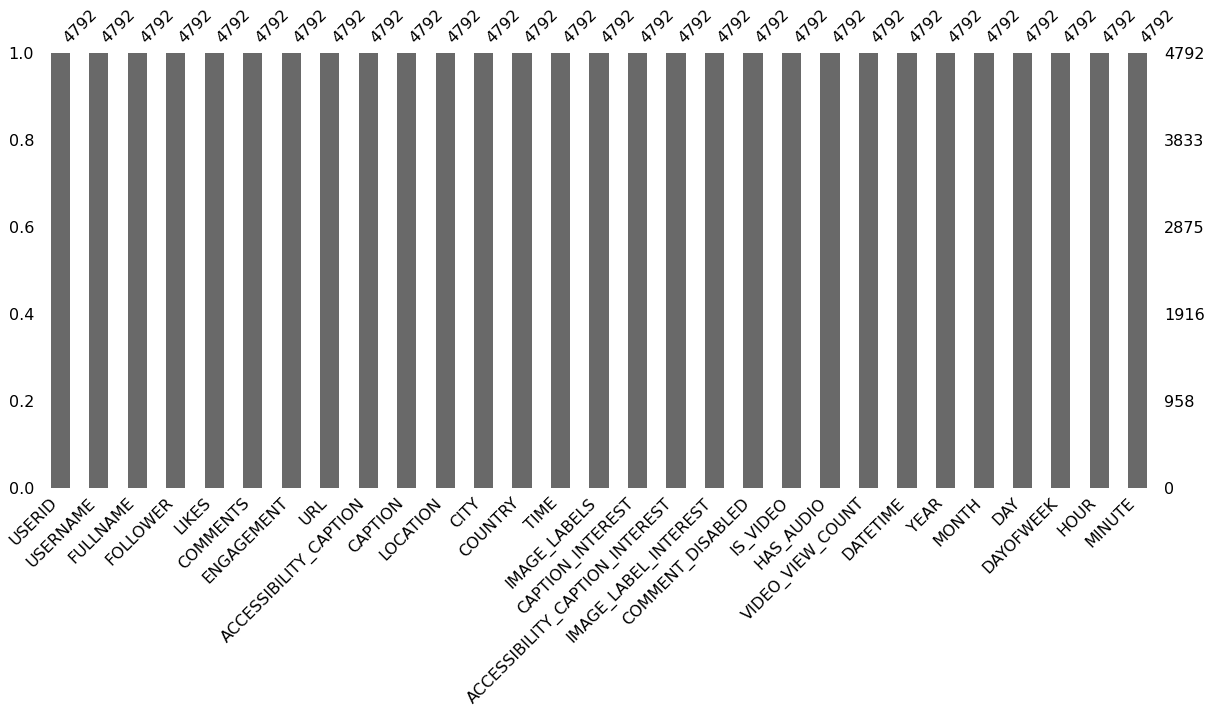

In [42]:
df["FULLNAME"].fillna("No FULLNAME", inplace = True)
df["LOCATION"].fillna("No Location", inplace = True)
df["COUNTRY"].fillna("No Country", inplace = True)
df["CITY"].fillna("No City", inplace = True)
df["ACCESSIBILITY_CAPTION"].fillna("No ACCESSIBILITY_CAPTION", inplace = True)
df["ACCESSIBILITY_CAPTION_INTEREST"].fillna("No ACCESSIBILITY_CAPTION_INTEREST", inplace = True)
df["CAPTION"].fillna("No CAPTION", inplace = True)
df["CAPTION_INTEREST"].fillna("No CAPTION_INTEREST", inplace = True)
df["IMAGE_LABEL_INTEREST"].fillna("No IMAGE_LABEL_INTEREST", inplace = True)
df["IMAGE_LABELS"].fillna("No IMAGE_LABELS", inplace = True)

msno.bar(df, figsize=(20, 8))

## Replacing Charecters  with Number

## Feature Engneering

# Split the Data

# Mechine Learning  Model

## Appling First1 Model 

## Validating the Model 

## Scoring 